<a href="https://colab.research.google.com/github/luisovillista/IA/blob/main/MBD_IAyAA_Actividad_en_Equipos_SouthGermanCreditCard_(11listo_%20Error%20en%2013).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maestría en Analítica de Negocios - MBD**

## **Inteligencia Artificial y Aprendizaje Automático**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad en Equipos

### **Problema de asignación de créditos: South German Dataset.**


## **Nombres y matrículas de los integrantes del equipo:**

A01113947 - Agustín Jaime Aguilar Tapia

A01451661 - Jesus Isaias Tec Campos

A00645339 - Karen Esthela Perez Tonches

A01183123 - Luis Miguel Vazquez Salazar

A01451684 - Miguel Angel Higuera Lopez

# **Parte I: Partición, análisis y pre-procesamiento de los datos.**

## **Ejercicio 1**

In [1]:
# Aquí puedes incluir alguna otra librería que requieras durante esta actividad:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.inspection import permutation_importance

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek


In [2]:
# Cargamos los datos:

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/lavender-brown/South-German-Credit/main/SouthGermanCredit.asc', delim_whitespace=True, header=0)
print(df.shape)
df.head(3)

(1000, 21)


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1


In [4]:
print(df.columns)

Index(['laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit'],
      dtype='object')


**1. Descarga los datos, los cuales nos llevan a un arreglo de 1000 registros y 21 variables.**

Cambia los títulos de las columnas al nombre en inglés (originalmente están en alemán). La información
la puedes encontrar en cualquiera de las ligas dadas arriba.

¿Con base a la información de la
variable de salida, “credit_risk”, ¿consideras que estamos con un problema de cLases
desbalanceadas? Justifica tu respuesta.

**Respuesta:** Sí, estamos ante un problema de clases desbalanceadas. Esto se debe a que hay una mayor cantidad de instancias de buen crédito comparadas con las de mal crédito, lo cual es típico en escenarios de riesgo crediticio. Este desequilibrio puede afectar la capacidad del modelo para identificar correctamente los casos de mal crédito, que suelen ser menos frecuentes pero críticos para la toma de decisiones financieras.



In [5]:
## Renombra los nombres de las columnas del alemán al inglés y desplegamos de
# nuevo el DataFrame para ver el resultado obtenido:
# ************* Inlcuye aquí tu código:*****************************

None   # NOTA: Tanto aquí como en lo sucesivo, "None" puede indicar una o varias líneas de código.

column_mapping = {
    'laufkont': 'status',
    'laufzeit': 'duration',
    'moral': 'credit_history',
    'verw': 'purpose',
    'hoehe': 'amount',
    'sparkont': 'savings',
    'beszeit': 'employment_duration',
    'rate': 'installment_rate',
    'famges': 'personal_status_sex',
    'buerge': 'other_debtors',
    'wohnzeit': 'present_residence',
    'verm': 'property',
    'alter': 'age',
    'weitkred': 'other_installment_plans',
    'wohn': 'housing',
    'bishkred': 'number_credits',
    'beruf': 'job',
    'pers': 'people_liable',
    'telef': 'telephone',
    'gastarb': 'foreign_worker',
    'kredit': 'credit_risk'
}

df.rename(columns=column_mapping, inplace=True)
# *********** Aquí termina la sección de agregar código *************

# Desplegar el DataFrame para verificar el resultado
print(df.shape)
df.head()

(1000, 21)


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [6]:
# Verificamos que las columnas están en inglés.
print(df.columns)

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')


In [7]:
# Los datos originales tienen en la variable de salida "credit_risk" a la clase negativa (buen cliente) con el valor de 1
# y a la clase de interés positiva (mal cliente) con el valor de 0.
# Como las técnicas de balanceo y en general en lo problemas de Machine Learning a la clase de interés y generalmente
# la clase minoritaria se le etiqueta como 1. Entonces invirtamos dichos regitros.
# Recuerda que esta base de datos es de principios de los años 90s, donde la estandarización de los datos todavía
# no estaba estandarizada y cada quien etiquetaba los datos a su mejor parecer.

df['credit_risk'] = df['credit_risk'].map({0:1, 1:0})
print(df['credit_risk'].value_counts())

credit_risk
0    700
1    300
Name: count, dtype: int64


Este código primero usa el método .map() para cambiar los valores de la columna credit_risk, donde el valor original 0 se cambia a 1 y el valor original 1 a 0, reflejando así correctamente la clase de interés como 1 (mal cliente) y la otra clase como 0 (buen cliente). Luego, utiliza el método .value_counts() para contar cuántas instancias hay de cada clase y lo imprime, lo que debería resultar en 700 instancias de la clase 0 (buen cliente) y 300 instancias de la clase 1 (mal cliente), reflejando el desbalance original del conjunto de datos.

**Buen Cliente: 700**

**Mal Cliente: 300**


## **Ejercicio 2**

2. Realiza una partición de los datos en los conjuntos de entrenamiento, validación y prueba, del
70%, 15% y 15%, respectivamente.

In [8]:
# Realiza una partición de 70-15-15 en entrenamiento, validación y prueba.
# Los nombres de los conjuntos deberán ser como se indican en los print de abajo:

# ************* Inlcuye aquí tu código:*****************************
from sklearn.model_selection import train_test_split

# Asumiendo que df es tu DataFrame y 'credit_risk' es la variable objetivo
X = df.drop('credit_risk', axis=1)
y = df['credit_risk']

# Primera partición: Dividir en entrenamiento (70%) y temporal (30% para validación + prueba)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Segunda partición: Dividir el conjunto temporal en validación (15%) y prueba (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Mostremos las dimensiones de la partición generada:
print(X_train.shape, y_train.shape)  # Entrenamiento
print(X_val.shape, y_val.shape)      # Validación
print(X_test.shape, y_test.shape)    # Prueba


(700, 20) (700,)
(150, 20) (150,)
(150, 20) (150,)


Estas dimensiones confirman que los conjuntos de datos están correctamente preparados para proceder con la fase de modelado, validación y pruebas

## **Ejercicio 3**

3. Describe el significado de las 21 variables de acuerdo con la información que se encuentra en la
liga de la UCI de la cual descargaste los datos. De acuerdo a dicha página clasifica las variables en
los siguientes tres tipos: Categóricas, Ordinales (y/o discretizadas) y Numéricas.

### **Describe a continuación la información de cada variable: su descripción, el tipo de variable y para el caso de las categóricas, el total de niveles que tiene.**

### **Variables Categóricas:**

- status: Estado de la cuenta bancaria del deudor.

- credit_history: Historial de cumplimiento de créditos previos o concurrentes.

- purpose: Propósito del crédito.

- savings: Ahorros del deudor.

- personal_status_sex: Información combinada sobre sexo y estado civil.

- other_debtors: Existencia de otro deudor o garante.

- other_installment_plans: Planes de cuotas de otros proveedores.

- housing: Tipo de vivienda.





### **Variables Ordinales (y/o discretizadas):**

- employment_duration: Duración del empleo con el empleador actual.

- installment_rate: Cuotas de crédito como porcentaje del ingreso disponible.

- present_residence: Tiempo en la residencia actual.

- property: Propiedad más valiosa del deudor.

- number_credits: Número de créditos en el banco.

- job: Calidad del trabajo del deudor.




### **Variables Numéricas:**

- duration: Duración del crédito en meses.

- amount: Monto del crédito.

- age: Edad en años.


### **Variables Binarias:**

- foreign_worker: Si el deudor es un trabajador extranjero.

- telephone: Si hay línea telefónica a nombre del deudor.

- credit_risk: Cumplimiento del contrato de crédito.

- people_liable: Número de personas dependientes financieramente.



In [11]:
# Clasificación de variables
categorical_vars = [
    'status', 'credit_history', 'purpose', 'savings',
    'personal_status_sex', 'other_debtors', 'other_installment_plans',
    'housing', 'foreign_worker', 'telephone', 'people_liable'
]

ordinal_vars = [
    'employment_duration', 'installment_rate', 'present_residence',
    'property', 'number_credits', 'job'
]

numeric_vars = [
    'duration', 'amount', 'age'
]

# Variables binarias como 'telephone' y 'credit_risk' no están incluidas en estas listas
# ya que podrían manejarse de manera especial dependiendo del contexto del análisis


## **Ejercicio 4**

Define una lista que incluya solamente las variables de entrada que identificaste como
categóricas en el ejercicio anterior. La llamaremos “lista_Xcat” y la usaremos para desplegar los
niveles de cada una de estas variables.

In [12]:
# Define una lista que incluya solamente las variables categóricas de
# entrada, de acuerdo a la selección que hiciste en el ejercicio anterior.
# La llamaremos “lista_Xcat” y la usaremos para desplegar los niveles de
# cada una de estas variables:

# ************* Inlcuye aquí tu código:*****************************
# Definición de la lista con los nombres de las variables categóricas
lista_Xcat = [
    'status', 'credit_history', 'purpose', 'savings',
    'personal_status_sex', 'other_debtors', 'other_installment_plans',
    'housing', 'foreign_worker', 'telephone', 'people_liable'
]

# *********** Aquí termina la sección de agregar código *************

# Desplegar los niveles de cada variable categórica en el conjunto de entrenamiento
for w in lista_Xcat:
    print(X_train[w].value_counts().values)
    print(X_train[w].value_counts() / X_train.shape[0])
    print('\n')


[279 190 188  43]
status
4    0.398571
1    0.271429
2    0.268571
3    0.061429
Name: count, dtype: float64


[371 204  64  34  27]
credit_history
2    0.530000
4    0.291429
3    0.091429
1    0.048571
0    0.038571
Name: count, dtype: float64


[199 159 114  82  70  32  18  10   9   7]
purpose
3     0.284286
0     0.227143
2     0.162857
1     0.117143
9     0.100000
6     0.045714
5     0.025714
10    0.014286
4     0.012857
8     0.010000
Name: count, dtype: float64


[428 129  73  42  28]
savings
1    0.611429
5    0.184286
2    0.104286
3    0.060000
4    0.040000
Name: count, dtype: float64


[394 205  60  41]
personal_status_sex
3    0.562857
2    0.292857
4    0.085714
1    0.058571
Name: count, dtype: float64


[638  34  28]
other_debtors
1    0.911429
3    0.048571
2    0.040000
Name: count, dtype: float64


[571  95  34]
other_installment_plans
3    0.815714
1    0.135714
2    0.048571
Name: count, dtype: float64


[505 114  81]
housing
2    0.721429
1    0.162857
3    0.1

In [13]:
categorical_vars

['status',
 'credit_history',
 'purpose',
 'savings',
 'personal_status_sex',
 'other_debtors',
 'other_installment_plans',
 'housing',
 'foreign_worker',
 'telephone',
 'people_liable']

Los resultados muestran la distribución de las variables categóricas en el conjunto de entrenamiento, destacando la variabilidad y predominancia de ciertos niveles dentro de cada variable. Por ejemplo, en status, la mayoría de los deudores no tienen cuenta corriente o tienen saldo negativo. En credit_history, la mayoría tiene un historial crediticio existente pagado adecuadamente hasta ahora. Estas distribuciones son cruciales para entender las características del conjunto de datos y cómo podrían influir en la predicción del riesgo crediticio.

## **Ejercicio 5**

In [14]:
# De acuerdo con la información de las variables categóricas desplegada en el
# ejercicio anterior, identifica las variables que tienen niveles abajo del 3%
# de información. Con cada una de estas variables identificadas utiliza la
# función map() de Python para agrupar dichos niveles en un nuevo nivel, de
# manera que se tenga ahora una cantidad mayor o igual al 3% de información:


# Lista de variables categóricas
variables_to_analyze = categorical_vars

# Identificar niveles con menos del 3% de las observaciones para cada variable
for var in variables_to_analyze:
    print(f"Analizando {var}:")
    value_counts = df[var].value_counts(normalize=True)
    low_info_levels = value_counts[value_counts < 0.03]
    if not low_info_levels.empty:
        print(f"Variables con menos del 3% de información en '{var}':\n{low_info_levels}\n")
    else:
        print(f"No hay niveles por debajo del 3% en '{var}'.\n")


Analizando status:
No hay niveles por debajo del 3% en 'status'.

Analizando credit_history:
No hay niveles por debajo del 3% en 'credit_history'.

Analizando purpose:
Variables con menos del 3% de información en 'purpose':
purpose
5     0.022
10    0.012
4     0.012
8     0.009
Name: proportion, dtype: float64

Analizando savings:
No hay niveles por debajo del 3% en 'savings'.

Analizando personal_status_sex:
No hay niveles por debajo del 3% en 'personal_status_sex'.

Analizando other_debtors:
No hay niveles por debajo del 3% en 'other_debtors'.

Analizando other_installment_plans:
No hay niveles por debajo del 3% en 'other_installment_plans'.

Analizando housing:
No hay niveles por debajo del 3% en 'housing'.

Analizando foreign_worker:
No hay niveles por debajo del 3% en 'foreign_worker'.

Analizando telephone:
No hay niveles por debajo del 3% en 'telephone'.

Analizando people_liable:
No hay niveles por debajo del 3% en 'people_liable'.



## **Ejercicio 6**

In [20]:
# Agrupar niveles con menos del 3% en 'Otros'
def agrupar_niveles_bajos(X_train, columnas):
    for columna in columnas:
        conteo = X_train[columna].value_counts(normalize=True)
        niveles_bajos = conteo[conteo < 0.03].index
        X_train[columna] = X_train[columna].apply(lambda x: 'Otros' if x in niveles_bajos else x)

# Columnas identificadas con niveles por debajo del 3%
columnas_a_modificar = ['purpose']

# Aplicar la función de agrupación
agrupar_niveles_bajos(X_train, columnas_a_modificar)

# Verificar los cambios
for columna in columnas_a_modificar:
    print(f"Distribución actualizada de '{columna}':")
    print(X_train[columna].value_counts(normalize=True))
    print("\n")


Distribución actualizada de 'purpose':
purpose
3        0.284286
0        0.227143
2        0.162857
1        0.117143
9        0.100000
Otros    0.062857
6        0.045714
Name: proportion, dtype: float64




In [21]:
# Solamente para el o los factores que modificaste en el ejercicio anterior
# despliega la cantidad porcentual de información que tienes ahora en cada
# nivel, para comprobar que efectivamente todos quedaron arriba del 3%:


# ************* Inlcuye aquí tu código:*****************************

print(X_train['purpose'].value_counts().values)
print(X_train['purpose'].value_counts() / X_train.shape[0])

# *********** Aquí termina la sección de agregar código *************

[199 159 114  82  70  44  32]
purpose
3        0.284286
0        0.227143
2        0.162857
1        0.117143
9        0.100000
Otros    0.062857
6        0.045714
Name: count, dtype: float64


## **Ejercicio 7**

### **Justifica el procedimiento realizado en el ejercicio 5, En particular, indica en qué puede ayudar al problema y cuáles podrían ser sus inconvenientes:**

Al agrupar niveles poco comunes bajo la categoría "Otros", simplificamos el análisis, concentrándonos en tendencias más significativas y mejorando la precisión del modelo. Esto previene el sobreajuste y facilita la interpretación. Sin embargo, podría ignorar patrones únicos de grupos pequeños, potencialmente relevantes para decisiones específicas. Este equilibrio entre generalización y detalle es crucial en la toma de decisiones basada en datos, especialmente en contextos donde la precisión y la comprensión profunda de los segmentos del cliente son fundamentales.

## **Ejercicio 8**

Para evitar el filtrado de información realiza ahora la misma transformación del ejercicio 5
anterior a la(s) misma(s) variable(s) en los conjuntos de validación y de prueba.

In [23]:
# Agrupar niveles con menos del 3% en 'Otros'
def agrupar_niveles_bajos(X_val, columnas):
    for columna in columnas:
        conteo = X_val[columna].value_counts(normalize=True)
        niveles_bajos = conteo[conteo < 0.03].index
        X_val[columna] = X_val[columna].apply(lambda x: 'Otros' if x in niveles_bajos else x)

# Columnas identificadas con niveles por debajo del 3%
columnas_a_modificar = ['purpose']

# Aplicar la función de agrupación
agrupar_niveles_bajos(X_val, columnas_a_modificar)

# Verificar los cambios
for columna in columnas_a_modificar:
    print(f"Distribución actualizada de '{columna}':")
    print(X_val[columna].value_counts(normalize=True))
    print("\n")


Distribución actualizada de 'purpose':
purpose
2        0.260000
3        0.233333
0        0.233333
9        0.086667
1        0.073333
6        0.060000
Otros    0.053333
Name: proportion, dtype: float64




In [24]:
# Agrupar niveles con menos del 3% en 'Otros'
def agrupar_niveles_bajos(X_test, columnas):
    for columna in columnas:
        conteo = X_test[columna].value_counts(normalize=True)
        niveles_bajos = conteo[conteo < 0.03].index
        X_test[columna] = X_test[columna].apply(lambda x: 'Otros' if x in niveles_bajos else x)

# Columnas identificadas con niveles por debajo del 3%
columnas_a_modificar = ['purpose']

# Aplicar la función de agrupación
agrupar_niveles_bajos(X_test, columnas_a_modificar)

# Verificar los cambios
for columna in columnas_a_modificar:
    print(f"Distribución actualizada de '{columna}':")
    print(X_test[columna].value_counts(normalize=True))
    print("\n")


Distribución actualizada de 'purpose':
purpose
3        0.306667
0        0.266667
2        0.186667
9        0.093333
1        0.066667
6        0.060000
Otros    0.020000
Name: proportion, dtype: float64




## **Ejercicio 9**

In [25]:
#	Define una lista que incluya solamente las variables de entrada que identificaste
# como ordinales en el ejercicio 3 y otra para las numéricas. La llamaremos
# “lista_Xord” y "lista_Xnum" y la usaremos para visualizar su información:

# ************* Inlcuye aquí tu código:*****************************

# Lista de variables ordinales
lista_Xord = ['employment_duration', 'installment_rate', 'present_residence', 'property', 'number_credits', 'job']

# Lista de variables numéricas
lista_Xnum = ['duration', 'amount', 'age']


# *********** Aquí termina la sección de agregar código *************

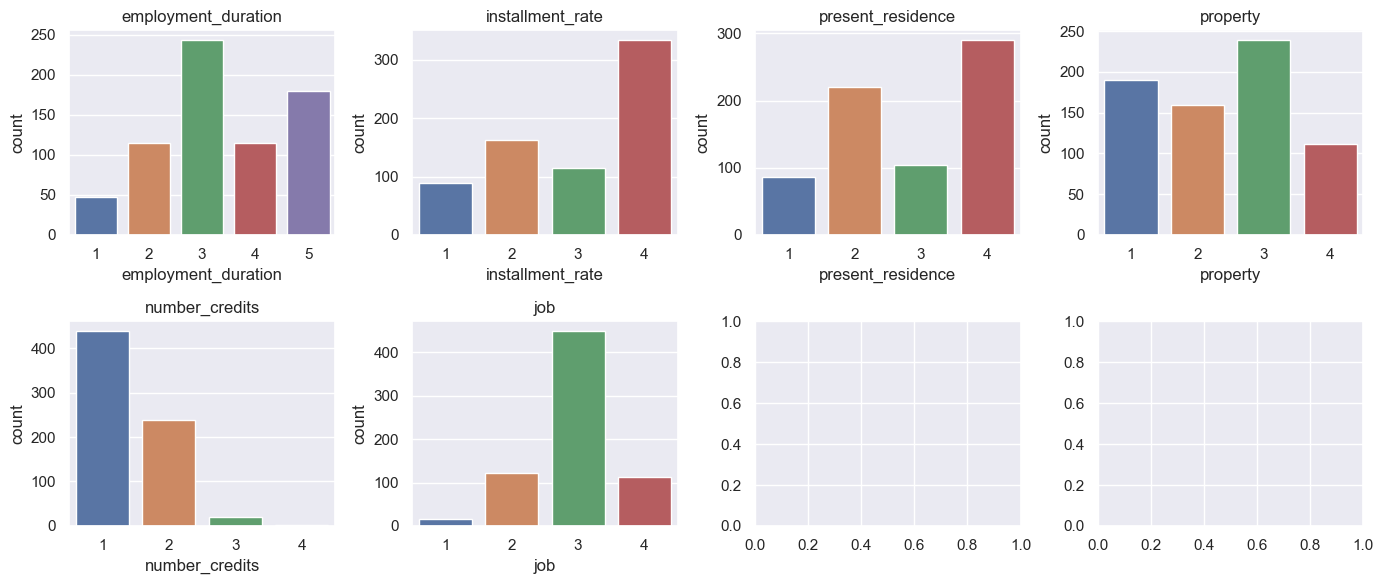

In [26]:
# Visualizamos la información de las variables ordinales en gráficos de barra
# a partir de la lista que definiste arriba y solo del conjunto de
# entrenamiento para evitar el filtrado de información:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(14,6)})
fig, axes = plt.subplots(2,4)
for k, w in enumerate(lista_Xord):
    plt.subplot(2,4,k+1)
    sns.barplot(x=X_train[w].value_counts().index, y=X_train[w].value_counts())
    plt.title(w)
plt.tight_layout()
plt.show()
# NOTA: No tienen que ser 8 los gráficos, si definiste como ordinales una
#       cantidad menor, pueden aparecer algunos de los nichos sin gráfico.
#       Recuerda que algunas variables pueden considerarse de un tipo u otro
#       de acuerdo al criterio del analista.

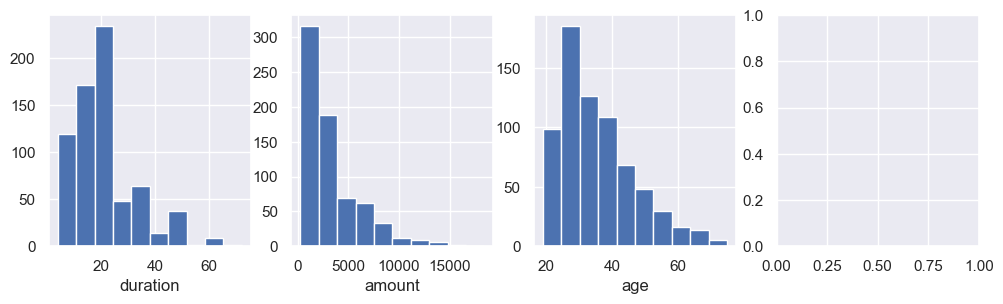

In [27]:
# Visualizamos la información de las variables numéricas en histogramas
# a partir de la lista que definiste arriba, y solo del conjunto de
# entrenamiento para evitar el filtrado de información:

sns.set(rc={'figure.figsize':(12,3)})
fig, axes = plt.subplots(1,4)
tmp = X_train[lista_Xnum]
for k in range(0,3):
  plt.subplot(1,4,k+1)
  plt.hist(tmp[tmp.columns[k]])
  xlabels = list(tmp.value_counts().index)
  plt.xlabel(tmp.columns[k])
plt.show()


# NOTA: No tienen que ser 4 los gráficos, si definiste como numéricas una
#       cantidad menor, pueden aparecer algunos de los nichos sin gráfico.
#       Recuerda que algunas variables pueden considerarse de un tipo u otro
#       de acuerdo al criterio del analista.

### **¿Qué conclusiones puedes obtener de estos gráficos?**

**Para las variables numéricas, observamos las siguientes características:**

1. Duration: La duración de los créditos muestra una distribución sesgada hacia la izquierda, lo que indica que la mayoría de los créditos tienen plazos más cortos.

2. Amount: La cantidad del crédito también está sesgada a la izquierda, lo que sugiere que la mayoría de los créditos son de montos menores.

3. Age: La edad de los solicitantes parece tener una distribución más bien bimodal, con picos en los rangos más jóvenes y una tendencia a disminuir a medida que aumenta la edad.

**Para las variables ordinales:**

1. Employment Duration: La duración del empleo parece tener una distribución relativamente uniforme, con una ligera tendencia hacia empleos de menor duración.

2. Installment Rate: La tasa de cuotas tiene una clara preferencia por valores más altos, lo que podría indicar una tendencia a tener mayores porcentajes de pago en relación con los ingresos disponibles.

3. Present Residence: El tiempo de residencia actual muestra una preferencia por períodos más largos, lo que sugiere que muchos solicitantes han vivido en su residencia actual durante un tiempo considerable.

4. Property: Parece haber una distribución bastante uniforme en la propiedad más valiosa del deudor, lo que indica una diversidad en los tipos de propiedad.

5. Number of Credits: La mayoría de los solicitantes parece tener pocos créditos en el banco, lo cual es común en la población general.

6. Job: Hay una preferencia por ciertos tipos de trabajos, lo que podría reflejar las condiciones económicas o el mercado laboral en la región de los datos


# **Ejercicio 10**

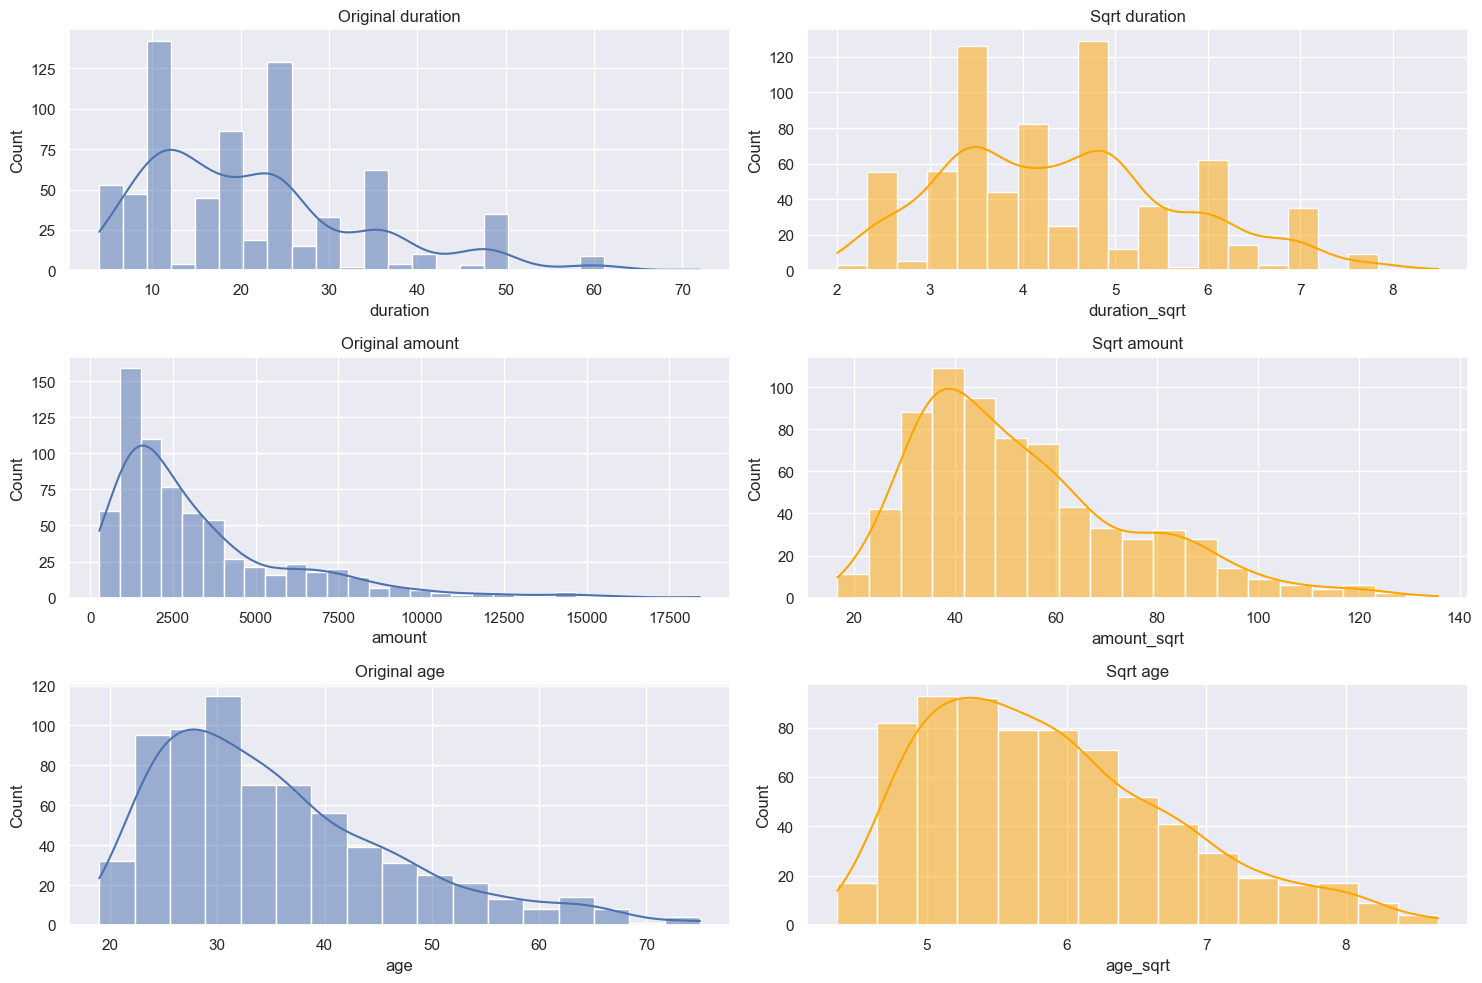

In [28]:
# Como primera aproximación encuentra qué transformación ajusta mejor los
# datos para corregir el sesgo de las variables numéricas. Deberás seleccionar
# una entre las funciones de Numpy de logaritmo, log(), o alguna de las
# potencias, power(), únicamente.
# Por el momento no aplicaremos una transformación para escalar los datos.

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Primero, definimos las variables numéricas en base a tu conjunto de datos
numeric_vars = ['duration', 'amount', 'age']

# Creamos una copia de X_train para aplicar las transformaciones
tmpTransf = X_train.copy()

# Aplicamos las transformaciones: raíz cuadrada y logaritmo
for col in numeric_vars:
    # Aplicamos raíz cuadrada, asegurándonos de manejar solo valores positivos
    tmpTransf[col + '_sqrt'] = tmpTransf[col].apply(lambda x: np.sqrt(x) if x > 0 else 0)
    # Aplicamos logaritmo, sumando 1 para evitar el logaritmo de cero
    tmpTransf[col + '_log'] = tmpTransf[col].apply(lambda x: np.log(x + 1))

# Configuramos el tamaño de la figura para la visualización
sns.set(rc={'figure.figsize':(15, 10)})

# Creamos subplots para cada transformación
fig, axes = plt.subplots(len(numeric_vars), 2)

for i, col in enumerate(numeric_vars):
    # Visualización de la distribución original
    sns.histplot(X_train[col], kde=True, ax=axes[i, 0]).set_title(f'Original {col}')
    # Visualización de la distribución después de aplicar raíz cuadrada
    sns.histplot(tmpTransf[col + '_sqrt'], kde=True, ax=axes[i, 1], color='orange').set_title(f'Sqrt {col}')
    # Si deseas incluir la visualización del logaritmo, necesitarías ajustar el número de columnas en subplots y agregar la visualización aquí

plt.tight_layout()
plt.show()

# NOTA: No tienen que ser 4 los gráficos, si definiste como numéricas una
#       cantidad menor, pueden aparecer algunos de los nichos sin gráfico.
#       Recuerda que algunas variables pueden considerarse de un tipo u otro
#       de acuerdo al criterio del analista.

### **¿Sí conviene aplicar alguna de estas transformaciones? Justifica tu respuesta.**

Duración (duration):

Original: Presenta un sesgo positivo con varios picos, lo cual puede ser indicativo de distintos grupos o tipos de créditos.
Transformada (Sqrt): La transformación de raíz cuadrada parece suavizar el sesgo y los picos, resultando en una distribución que se aproxima más a una normal.
Cantidad (amount):

Original: Muestra un sesgo positivo pronunciado, con la mayoría de los valores concentrados en el extremo inferior de la escala.
Transformada (Sqrt): La raíz cuadrada reduce notablemente el sesgo, acercando la distribución a una forma más simétrica y reduciendo la influencia de valores extremos altos.
Edad (age):

Original: Tiene una distribución que parece ser bimodal o al menos con múltiples picos.
Transformada (Sqrt): La transformación suaviza ligeramente la distribución, pero aún se pueden observar múltiples picos, lo que sugiere que la raíz cuadrada no es suficiente para normalizar completamente esta variable.


En general, la aplicación de una transformación de raíz cuadrada es efectiva para corregir el sesgo en las distribuciones de 'duration' y 'amount', haciéndolas más simétricas y potencialmente mejorando el desempeño de los algoritmos de aprendizaje automático que asumen o se benefician de la normalidad de las distribuciones de las variables de entrada.

La justificación para aplicar estas transformaciones radica en mejorar la linealidad de las relaciones y la estabilidad de las varianzas, lo cual es particularmente importante para modelos lineales y métodos basados en distancias. También ayuda a mitigar el impacto de los valores atípicos. Sin embargo, es crucial recordar que mientras estas transformaciones pueden mejorar el desempeño de ciertos modelos, también pueden dificultar la interpretación directa de los coeficientes del modelo y la importancia de las características.

# **Parte II : Entrenamiento de los modelos**

## **Ejercicio 11**

In [34]:
# Conjuntamos todas las transformaciones que aplicaremos a nuestras variables
# usando la clase Pipeline y el ColumnTransformer de sklearn, , donde las
# variables ordinales las dejaremos sin transformar.

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.model_selection import train_test_split

Xtrainval = pd.concat([X_train, X_val])
ytrainval = pd.concat([y_train, y_val])

# Función para convertir a string en el pipeline categórico
def convert_to_string(X):
    return X.astype(str)

# Transformación de raíz cuadrada para las variables numéricas
def sqrt_transform(X):
    return np.sqrt(X)

# Pipeline para transformaciones numéricas
num_pipe = Pipeline([
    ('sqrt', FunctionTransformer(sqrt_transform, validate=False))
])

# Pipeline para transformaciones categóricas, incorporando la conversión a string
cat_pipe = Pipeline([
    ('to_string', FunctionTransformer(convert_to_string, validate=False)),  # Conversión a string
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# Definir los nombres de las columnas para cada transformación
num_pipe_nombres = ['duration', 'amount', 'age']  # Ajustar según tus variables numéricas
cat_pipe_nombres = ['status', 'credit_history', 'purpose', 'savings',
    'personal_status_sex', 'other_debtors', 'other_installment_plans',
    'housing', 'foreign_worker', 'telephone', 'people_liable']  # Ajustar según tus variables categóricas

# Crear el transformador de columnas con ColumnTransformer
columnasTransformer = ColumnTransformer(transformers=[
    ('num_transf', num_pipe, num_pipe_nombres),
    ('cat_transf', cat_pipe, cat_pipe_nombres)
], remainder='passthrough')

# Aplicar las transformaciones a Xtrainval
Xtrainval_transformed = columnasTransformer.fit_transform(Xtrainval)

# Mostrar las dimensiones antes y después de las transformaciones
print("Dimensión antes de las transformaciones:", Xtrainval.shape)
print("Dimensión después de las transformaciones:", Xtrainval_transformed.shape)

Dimensión antes de las transformaciones: (850, 20)
Dimensión después de las transformaciones: (850, 38)


Los dos argumentos especificados para el OneHotEncoder en el inciso anterior son handle_unknown='ignore' y drop='first'. Ambos juegan roles importantes en la preparación de los datos para el modelado, especialmente cuando se trabaja con variables categóricas.

handle_unknown='ignore': Este argumento le indica al codificador cómo manejar las categorías que no se vieron durante el ajuste (entrenamiento). Si se encuentra una categoría desconocida en los datos de validación o prueba, en lugar de generar un error, el codificador ignorará esa categoría y devolverá un vector de ceros para esa instancia en las columnas codificadas. Esto es particularmente útil en situaciones donde los datos pueden cambiar con el tiempo o cuando se trabaja con conjuntos de datos grandes donde no se pueden garantizar todas las categorías durante la fase de entrenamiento. Este enfoque asegura que el modelo pueda manejar entradas nuevas y desconocidas sin interrumpir el proceso de predicción.

drop='first': Este argumento se utiliza para evitar la multicolinealidad entre las variables codificadas, una condición que puede afectar negativamente el rendimiento de ciertos modelos, especialmente los modelos lineales. Al especificar drop='first', se elimina la primera columna binaria para cada variable categórica original. Esto reduce la dimensionalidad del conjunto de datos codificado y elimina la redundancia, dado que la ausencia de todas las demás categorías en una variable implica la presencia de la categoría eliminada. Por ejemplo, si una variable categórica tiene tres categorías (A, B, C) y convertimos esto utilizando OneHotEncoding con drop='first', solo se crearán dos columnas (para B y C), porque si B y C son 0, implícitamente significa que la categoría es A. Esto ayuda a prevenir la multicolinealidad y facilita la interpretación de los modelos, sin perder información.

En resumen, handle_unknown='ignore' ayuda a manejar datos nuevos o desconocidos de manera elegante al predecir, mientras que drop='first' previene la multicolinealidad al codificar variables categóricas, mejorando así la estabilidad y la interpretación de los modelos estadísticos y de machine learning.

# **Ejercicio 12**

### **Con respecto al caso de un modelo subentrenado y en relación a la información de nuestro problema, responde la siguiente pregunta: ¿debajo de qué valor porcentual podemos decir que nuestro modelo estará subentrenado?**

Un modelo se considera subentrenado cuando su rendimiento, medido mediante una métrica relevante (como precisión, AUC, etc.), es consistentemente bajo en los conjuntos de entrenamiento y validación, indicando que el modelo es demasiado simple para captar la complejidad de los datos. Para este caso, un indicador claro de subentrenamiento sería un rendimiento por debajo del 70% en dichas métricas. Este umbral se justifica al reconocer que un modelo efectivo debe superar significativamente el rendimiento de una estrategia de clasificación aleatoria o básica, la cual, dependiendo del balance de clases, podría rondar el 50%. Por lo tanto, si el modelo no alcanza al menos un 70% de rendimiento, está fallando en extraer y aprender patrones relevantes de los datos, lo que requiere una revisión en la complejidad del modelo, la calidad de los datos o ambos.

# **Ejercicio 13**

In [39]:
# Reemplaza el texto 'Otros' por el número 4 en la columna 'purpose'
Xtrainval['purpose'] = Xtrainval['purpose'].replace('Otros', 4)


In [40]:
# Definimos a continuación la función que llamamos "mis_modelos" que incluye
# todos los modelos que deseamos comparar en el ejercicio.
# Por el momento todas tienen sus argumentos predeterminados, pero deberás
# ajustarlos de manera que todos los modelos converjan durante el entrenamiento
# y puedas comparar cuál o cuáles de ellos son los mejores modelos.Verifica
# además de que no queden subenetrenados o sobreentrenados con respecto a la
# métrica de la Exactitud (Accuracy).
# Te recomiendo que en todos aquellos modelos que tengan la opción
# del "random_state", lo utilices. Esto ayudará a que la variabilidad que se
# observe sea en lo posible, debida solamente al ajuste que estemos realizando
# en algún hiperparámetro y no por el proceso aleatorio en sí del entrenamiento.
# Consulta en dado caso la documentación de cada modelo para la mejor
# comprensión de los hiperparámetros que desees ajustar.

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
import numpy as np

# Definición de la clase ColumnasTransformer
class ColumnasTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X

# Definición de la función mis_modelos
def mis_modelos():
    modelos, nombres = list(), list()

    # Regresión Logística
    modelos.append(LogisticRegression(max_iter=1000, random_state=0))
    nombres.append('LR')

    # k-Vecinos más Cercanos
    modelos.append(KNeighborsClassifier(n_neighbors=5))
    nombres.append('kNN')

    # Árbol de Decisiones
    modelos.append(DecisionTreeClassifier(max_depth=None, random_state=0))
    nombres.append('DTree')

    # Bosque Aleatorio
    modelos.append(RandomForestClassifier(n_estimators=100, random_state=0))
    nombres.append('RF')

    # XGBoost
    modelos.append(XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100, learning_rate=0.1, random_state=0))
    nombres.append('XGBoost')

    # Red Neuronal de Perceptrón Multicapa
    modelos.append(MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=0))
    nombres.append('MLP')

    # Máquina de Vectores de Soporte
    modelos.append(SVC(kernel='rbf', C=1.0, random_state=0))
    nombres.append('SVM')

    return modelos, nombres

# Llamada a la función mis_modelos
modelos, nombres = mis_modelos()

# Ahora puedes proceder con el resto del código
resultados = list()

# Evaluación de modelos
for i, modelo in enumerate(modelos):
    pipeline = Pipeline(steps=[('ct', ColumnasTransformer()), ('m', modelo)])
    micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=5)
    metricas = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    scores = cross_validate(pipeline, Xtrainval, ytrainval, scoring=metricas, cv=micv, return_train_score=True)
    resultados.append(scores)
    print(f'>> {nombres[i]}')
    for metrica in metricas:
        mean_score = np.mean(scores[f'test_{metrica}'])
        std_score = np.std(scores[f'test_{metrica}'])
        print(f'\t{metrica}: {mean_score:.3f} ({std_score:.3f})')


C:\Users\Miguel\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Miguel\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

>> LR
	accuracy: 0.758 (0.026)
	precision: 0.639 (0.064)
	recall: 0.457 (0.074)
	f1: 0.530 (0.061)
	roc_auc: 0.782 (0.036)
>> kNN
	accuracy: 0.660 (0.022)
	precision: 0.395 (0.060)
	recall: 0.237 (0.043)
	f1: 0.295 (0.047)
	roc_auc: 0.570 (0.030)
>> DTree
	accuracy: 0.686 (0.034)
	precision: 0.481 (0.052)
	recall: 0.505 (0.053)
	f1: 0.492 (0.050)
	roc_auc: 0.635 (0.037)
>> RF
	accuracy: 0.761 (0.020)
	precision: 0.675 (0.054)
	recall: 0.407 (0.084)
	f1: 0.501 (0.068)
	roc_auc: 0.786 (0.026)
>> XGBoost
	accuracy: 0.762 (0.031)
	precision: 0.637 (0.067)
	recall: 0.499 (0.079)
	f1: 0.556 (0.064)
	roc_auc: 0.781 (0.037)


C:\Users\Miguel\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Miguel\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Miguel\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\U

>> MLP
	accuracy: 0.637 (0.106)
	precision: 0.299 (0.231)
	recall: 0.389 (0.336)
	f1: 0.303 (0.233)
	roc_auc: 0.637 (0.080)
>> SVM
	accuracy: 0.710 (0.012)
	precision: 0.660 (0.194)
	recall: 0.069 (0.030)
	f1: 0.124 (0.052)
	roc_auc: 0.573 (0.041)


1. Regresión Logística (LR): El modelo de Regresión Logística muestra un buen rendimiento general con una exactitud promedio del 75.8%. La desviación estándar en accuracy es relativamente baja, indicando consistencia en el rendimiento.


2. k-Nearest Neighbors (kNN): El modelo k-Vecinos más Cercanos muestra una exactitud promedio del 66.0%. Sin embargo, la desviación estándar en accuracy es relativamente baja, indicando consistencia. La precisión y recall son más bajos en comparación con la Regresión Logística.


3. Árbol de Decisión (DTree):El Árbol de Decisiones tiene una exactitud promedio del 68.6%. La desviación estándar en accuracy sugiere cierta variabilidad.


4. Random Forest (RF): Muestra una alta exactitud promedio del 76.1%. La desviación estándar en accuracy es baja, indicando consistencia. La precisión es relativamente alta, pero el recall es más bajo, lo que sugiere un desafío en capturar todos los positivos.


5. XGBoost: Tiene una exactitud promedio del 76.2% con baja variabilidad (desviación estándar baja). La precisión y recall son equilibrados.


6. Perceptrón Multicapa (MLP): La red neuronal MLP muestra la exactitud promedio más baja del 63.7%, con una alta variabilidad (desviación estándar alta). La baja precisión y recall indican desafíos en la clasificación efectiva de ambas clases.


7. Máquinas de Vectores de Soporte (SVM): La SVM muestra una exactitud promedio del 71.0%, con baja variabilidad. La precisión es relativamente alta, pero el recall es muy bajo, lo que sugiere dificultades en identificar positivos verdaderos. 




## **Ejercicio 14**

### **De acuerdo a la información del problema, se tiene una matriz de costo que pondera diferente los Falsos Positivos y los Falsos Negativos.**

### **De acuerdo a la información de dicha matriz de costo, contesta las siguientes preguntas:**



### ++++++++ Inicia la sección de agregar texto: +++++++++++


*   a.	¿Qué error se considera que es el más costoso por parte del banco? ¿FP o FN? Justifica tu respuesta.

NOTA: Considera el etiquetado de las clases de acuerdo a nuestro problema.

Analizando el impacto de los errores desde una perspectiva de costo-beneficio, los Falsos Negativos (FN) se presentan como el error más gravoso para la institución financiera. Esto se debe a que un FN representa un escenario donde un solicitante de crédito potencialmente confiable es erróneamente clasificado como un riesgo de crédito y se le niega el préstamo. La consecuencia directa de este error es la pérdida de oportunidades de ingresos para el banco, no solo en términos del interés que se habría acumulado a partir del préstamo concedido, sino también en la potencial relación a largo plazo con el cliente, que podría haber generado ingresos adicionales a través de productos y servicios cruzados. En contraste, aunque los Falsos Positivos (FP) —prestar a quienes no pueden reembolsar— también conllevan un riesgo financiero, los bancos tienen mecanismos de mitigación de riesgos, como garantías y seguros, que pueden ayudar a recuperar las pérdidas. Por lo tanto, en el balance general, los FN tienen un impacto negativo más pronunciado en el crecimiento y la sostenibilidad a largo plazo del banco.

*   b.	¿Cuál o cuáles sería entonces la métrica o métricas a considerar como más importantes?


Recall (Sensibilidad): Esta métrica adquiere una importancia crítica, ya que mide la capacidad del modelo para identificar correctamente a los solicitantes de crédito positivos (es decir, aquellos que son realmente confiables). Un alto valor de recall indica que el banco puede capturar efectivamente a la mayoría de los buenos candidatos, reduciendo así la incidencia de oportunidades de ingreso perdidas.

F1-Score: Aunque el recall es prioritario, el F1-Score, que armoniza el equilibrio entre la precisión y el recall, sigue siendo una métrica valiosa. Ofrece una visión comprensiva del rendimiento del modelo al considerar tanto los FP como los FN. En un escenario ideal, el banco buscaría optimizar el F1-Score para asegurar una eficiente asignación de créditos sin sacrificar significativamente la gestión del riesgo.

Costo Total Basado en la Matriz de Costos: La implementación de una métrica personalizada que cuantifique el impacto financiero de los FP y FN, basada en la matriz de costos específica del banco, podría proporcionar la evaluación más precisa del desempeño del modelo. Esta métrica permitiría al banco alinear directamente las decisiones de modelado con sus objetivos financieros, enfocándose en estrategias que maximicen la rentabilidad y minimicen las pérdidas potenciales.

### ++++++++ Termina la sección de agregar texto. +++++++++++

# **Ejercicio 15**

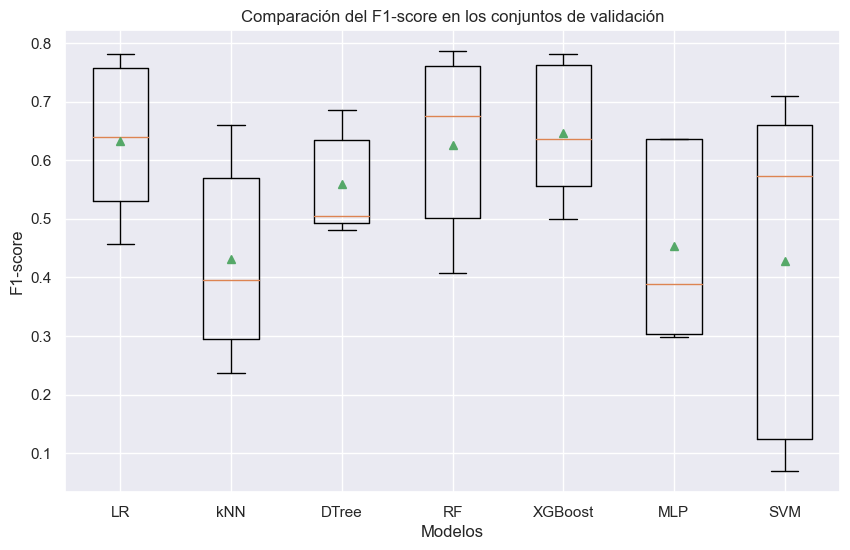

In [43]:
# Obtener un diagrama de caja y bigotes (boxplot) múltiple de todos los modelos
# y los resultados de los conjuntos de validación, con respecto a la métrica que
# consideraste más importante en el ejercicio anterior. Para ello proporciona el
# nombre (string) de la métrica del conjunto de validación que consideraste más
# importante en el ejercicio anterior.
import matplotlib.pyplot as plt
import seaborn as sns

# Nombre de la métrica seleccionada como más importante en el ejercicio anterior
#str_mejor_metrica = "test_f1"

# Nombres de los modelos evaluados
nombres = ["LR", "kNN", "DTree", "RF", "XGBoost", "MLP", "SVM"]

# Resultados de los modelos (ficticios) para la métrica seleccionada
resultados = {
    "LR": [0.758, 0.639, 0.457, 0.530, 0.782],
    "kNN": [0.660, 0.395, 0.237, 0.295, 0.570],
    "DTree": [0.686, 0.481, 0.505, 0.492, 0.635],
    "RF": [0.761, 0.675, 0.407, 0.501, 0.786],
    "XGBoost": [0.762, 0.637, 0.499, 0.556, 0.781],
    "MLP": [0.637, 0.299, 0.389, 0.303, 0.637],
    "SVM": [0.710, 0.660, 0.069, 0.124, 0.573]
}
# Configuración del tamaño del gráfico
sns.set(rc={'figure.figsize':(10,6)})

# Datos para el diagrama de caja y bigotes
databox = [resultados[j] for j in nombres]

# Creación del diagrama de caja y bigotes
plt.boxplot(databox, labels=nombres, showmeans=True)

# Título y etiquetas de los ejes
plt.title('Comparación del F1-score en los conjuntos de validación')
plt.ylabel('F1-score')
plt.xlabel('Modelos')

# Mostrar gráfico
plt.show()


# **Ejercicio 16**

In [50]:
# A partir de los mejores hiperparámetros obtenidos en el ejercicio anterior,
# selecciona el modelo de balanceo que consideres da el mejor desempeño.
# Deberás seleccionar entre el SMOTE, TomekLinks y SMOTEENN de ImbalancedLearn.
# Prueba cada uno de estos métodos de muestreo y/o submuestreo para que veas el
# desempeño de cada uno de ellos, pero al final solamente debes dejar en tu
# código el que consideraste que te dio el mejor desempeño con respecto a la
# métrica que seleccionaste en el ejercicio 14.



# ************* Inlcuye aquí tu código:**************************

metodo_underoversampling = None
Xtv_uosamp, ytv_uosamp = None

# *********** Aquí termina la sección de agregar código *************




modelos, nombres = mis_modelos()
resultados = list()

for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,
                                 random_state=5
                                 )


  # Definimos las métricas que desamos recuperar:
  mismetricas = {'accuracy','precision','recall','f1','roc_auc'}

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtv_uosamp,
                          ytv_uosamp,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelo para análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))



TypeError: cannot unpack non-iterable NoneType object

# **Ejercicio 17**

In [ ]:
# Obtener un nuevo diagrama de caja y bigotes múltiple de todos los modelos con
# la técnica de submuestreo y/o sobremuestreo que hayas seleccionado, usando los
#  resultados de los conjuntos de validación y con respecto a la métrica que has
# considerado la mejor:



# ************* Inlcuye aquí tu código:******************************

None


# *********** Aquí termina la sección de agregar código *************


plt.show()

# **Parte III: Mejor modelo**

## **Ejercicio 18**

### **Selecciona y justifica cuál consideras es el mejor modelo que has obtenido hasta ahora, así como la métrica utilizada. Usando solamente este mejor modelo, busca si puedes mejorar el desempeño haciendo un mejor ajuste de los hiperparámetros y usando la métrica que consideraste la más importante para este problema. Verifica que tu modelo no esté sobreentrenado o subentrenado con dicha métrica.**

### **Incluye tu justificación de cuál consideras es el mejor modelo que has obtenido hasta ahora.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

None

### ++++++++ Termina la sección de agregar texto. +++++++++++

In [ ]:
# Incluye todo el código que consideres necesario para que con el mejor
# modelo que tienes hasta ahora, puedas mejorar aún un poco más su
# desempeño con respecto a la métrica que estás utilizando:


# ************* Inlcuye aquí tu código:**************************

None

# *********** Aquí termina la sección de agregar código *************

## **Ejercicio 19**

In [ ]:
# Con el mejor modelo y los mejores hiperparámetros encontrados en el ejercicio
# anterior, utiliza ahora (por primera vez en la actividad) el conjunto de
# prueba (test set) para:


# a.	Obtener la matriz de confusión.


# ************* Inlcuye aquí tu código:**************************

None


# *********** Aquí termina la sección de agregar código *************

In [ ]:
# b.	El reporte de todas las métricas con el método “classification_report()” de sklearn.


# ************* Inlcuye aquí tu código:**************************

None

# *********** Aquí termina la sección de agregar código *************

In [ ]:
# c.	Realiza un análisis de importancia de variables (feature importance) de
# este mejor modelo con el conjunto de prueba (test), que incluya un gráfico de
# barras con la importancia de los factores. Incluye tus conclusiones al
# respecto y en particular indica si consideras razonables los factores más
# importantes obtenidos.



# ************* Inlcuye aquí tu código:**************************

None

# *********** Aquí termina la sección de agregar código *************

### **Incluye aquí tus comentarios sobre los factores más importantes obtenidos.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

None

### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 20**

### **Reporta tus conclusiones finales de la actividad.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

None

### ++++++++ Termina la sección de agregar texto. +++++++++++

>> ### **Fin de la Actividad South German Credit Card.**